# Lecture 7, Data science in Neuroscience

## Plan for today

1. Statistical testing in Python
2. General approach for statistical testing
3. Examples
    1. Pearson correlation analysis
    2. T-test and Wilcoxon rank sum test.
4. Common mistakes when applying statistical tests
   

*** 

## Statistical testing in Python

For common statistical tests, you can look in `SciPy` or `Statsmodels`.

[SciPy](https://scipy.org/) provides functions for several classical tests. Look into `scipy.stats`. 

* [List of tests in scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)
* [List of correlation functions](https://docs.scipy.org/doc/scipy/reference/stats.html#correlation-functions)


[Statsmodels](https://www.statsmodels.org/stable/index.html) is Python module that implements several statistical tests.


***

## General approach when performing statistical testing

1. Identify the question that you want to test.
2. Search for the appropriate test.
3. List the assumptions of the test and make sure the data do not violate the assumptions
4. State your null hypothesis
5. Calculate the statistics
6. Decide whether you can reject the null hypothesis
7. Draw a conclusion




*** 

## Pearson correlation

A Pearson correlation is used to test whether there is a linear relationship between two variables.

The two variables are obtained from the same statistical unit (e.g., neuron, subject, etc.). For example, we could test if there is a linear relationship between the intellectual quotient (IQ, human intelligence) and the salary in a group of people.

In the example below, we will use simulated data. We will always know whether there is a linear relationship between the variables. 

In real experiments, you don't know whether the two variables are related or not. The Pearson correlation test will tell you whether there is a significant linear relationship in your data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
nSize=50
iq = np.random.normal(loc=100,scale=10,size=nSize)
print("iq:")
print(iq)
salary = iq * 1000 + np.random.normal(loc=0,scale=10000, size=nSize)
print("salary:")
print(salary)

iq:
[ 96.18434064 107.61298082  98.43096859  99.60927295 110.31047221
 101.95111274  87.03758041  89.18999044  90.49866456  78.88335089
 114.63350053  97.88686251 110.2057629   96.2894772   86.96648809
 106.91561543  99.99292859  97.6929248  125.40237241  94.06763202
 104.65639852  89.38131718 100.37045021  98.52978761 114.60468888
 100.04037074  85.97445103 112.03914615  97.20314324  97.6788167
  87.39512135 100.72716041 109.32283132 115.44318592  90.04316223
 105.85225524  95.52750986  96.25344595  84.15562102 105.6334048
 112.98756967 101.3667686  113.67157883  88.5791924  100.61610818
  97.24164877 105.99060818  89.20079055  93.19207556  78.02257169]
salary:
[100701.37463814 106713.48317291  97013.92230088  96922.80070208
 117663.68310099 114996.2809479   94389.49741684  86884.08759618
 105583.59610528  73490.37490365 133259.52075373  99957.8337501
 112323.15537413  96498.95685857  80220.07379044 101889.6672477
 107860.82577002 104618.13517051 117920.58486555  93456.04256518
 10878

Is there a relationship between `iq` and `salary`?

#### Assumptions:

1. The 2 variables are continuous
2. The 2 variables are normally distributed
3. There is no outlier
4. The relationship between the two variables is linear

If the data violate these assumptions, choose a different test. In real life, salary might not be normally distributed. IQ is likely to be normally distributed.

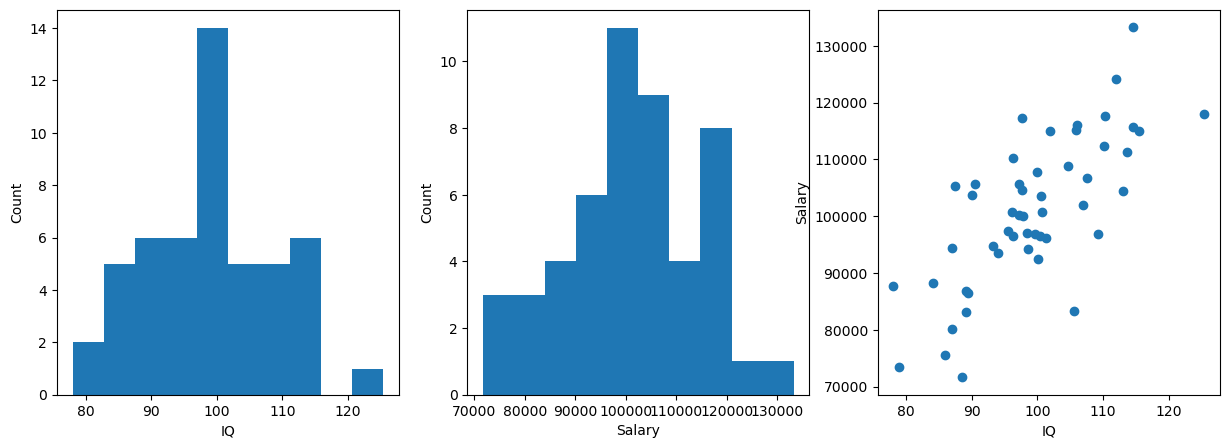

In [4]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].hist(iq)
ax[0].set_xlabel("IQ")
ax[0].set_ylabel("Count")

ax[1].hist(salary)
ax[1].set_xlabel("Salary")
ax[1].set_ylabel("Count")

ax[2].scatter(iq,salary)
ax[2].set_xlabel("IQ")
ax[2].set_ylabel("Salary")

plt.show()



Our data look normally distributed, there are not outliers, and the relationship appears linear.

#### State the null hypothesis

$H_0$: There is no linear relationship between the 2 variables.

$H_1$: There is a linear relationship between the 2 variables.

You can't prove the null hypothesis ($H_0$). You can only provide evidence to reject $H_0$. 

#### Calculate the statistics: r-value and associated p-value

The `r-value` measures the strength of the relationship. Values close to -1 or 1 mean very strong relationships. Values near 0 mean no relationship.

$r = \frac{\sum (x - \mu_x) (y - \mu_y)}
             {\sqrt{\sum (x - \mu_x)^2 \sum (y - \mu_y)^2}}$
             
$\mu_x$ and $\mu_y$ are the means for `x` and `y`.

The numerator decides how large the r-value will be and whether it will be positive or negative.

The denominator restrict the possible ranges from -1 to 1.
                          

The `p-value` is the probability of obtaining results (r-value) at least as extreme as the observed results, assuming that the null hypothesis is correct.



### Exercise:

Write the code to calculate the r-value

In [5]:
x = iq
y = salary

x1=x-np.mean(x)
y1=y-np.mean(y)

numerator = np.sum(x1*y1) 
denominator = np.sqrt(np.sum(x1**2)*np.sum(y1**2))

r = numerator/denominator
r

0.7298361971528126

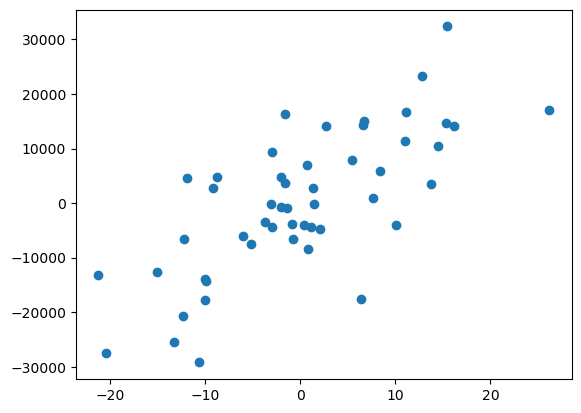

In [6]:
plt.scatter(x1,y1)

In [5]:
?stats.pearsonr

Signature: stats.pearsonr(x, y)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets.  The calculation of the p-value relies on the
assumption that each dataset is normally distributed.  (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)  Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets.

Parameters
----------
x : (N,) array_like
    Input
y : (N,) array_like
    Inp

In [7]:
stats.pearsonr(iq,salary)

PearsonRResult(statistic=0.7298361971528127, pvalue=1.818356152533963e-09)

#### Decide whether you can reject the null hypothesis

We need a significance threshold for the p-value, often referred to as ($\alpha$). The typical value is 0.05.

* If p-value is smaller than 0.05: We reject the null hypothesis that there is no relationship between the two variables.
* If p-value is larger than or equal to 0.05: We can't reject the null hypothesis.

You can't prove that the null hypothesis is true.

#### Draw a conclusion based on the r-value

The r-value is close to 0.72.

There is a positive linear relationship between variables IQ and the salary.


***
### Spot the assumption violation

These data are not suitable for Pearson correlation analysis. 

Can you find which assumption of the Pearson correlation is violated in each of the 4 plots below?


<div>
<img src="../images/pearsonAssumptionViolations.png"/>
</div>

### Types of errors associated with your conclusion

Even if the data do not violate the assumptions behind Pearson correlation, your conclusion can still be wrong.

When making a conclusion, 4 scenarios are possible

* Correctly concluding that there is a linear relationship between the 2 variables (true positive)
* Correctly accepting the null hypothesis that there is no relationship between the 2 variables (true negative)
* Falsly concluding that there is a linear relationship between the 2 variables (false positive)
* Falsly accepting the null hypothesis that there is no relationship between the 2 variables (false negative)


We will cover `false positives` and `false negatives` in more details.

#### False positives

A significant p-value does not necessarily mean that there is a linear relationship between the variables. 

Even variables that are not related will give you a significant linear relationship from time to time.

With a threshold of 0.05, you will falsly conclude that there is a linear relationship 5% of the time (assuming the assumptions are respected).

In the code below, we perform a Pearson correlation on 2 variables (a and b) that have no linear relationship between them. We get false positive from time to time.


In [10]:
nSize=50
for i in range(50):
    a = np.random.normal(loc=10,scale=5,size=nSize)
    b = np.random.normal(loc=0,scale=5, size=nSize) # b does not depend on a, they are completely independent
    r,p = stats.pearsonr(a,b)
    if(p<0.05):
        print("False detection of a linear relationship (false positive)")
    else:
        print("Can't reject the null hypothesis (true negative)")

Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
False detection of a linear relationship (false positive)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't reject the null hypothesis (true negative)
Can't rejec

This is why you can't apply a Pearson correlation or t-test multiple times without a special correction procedure that limits false positives.

Imagine an experiment in which we have a set of variables and we perform a pearson correlation between all the possible combinations of variables. You would expect to find a significant results every 20 tests.


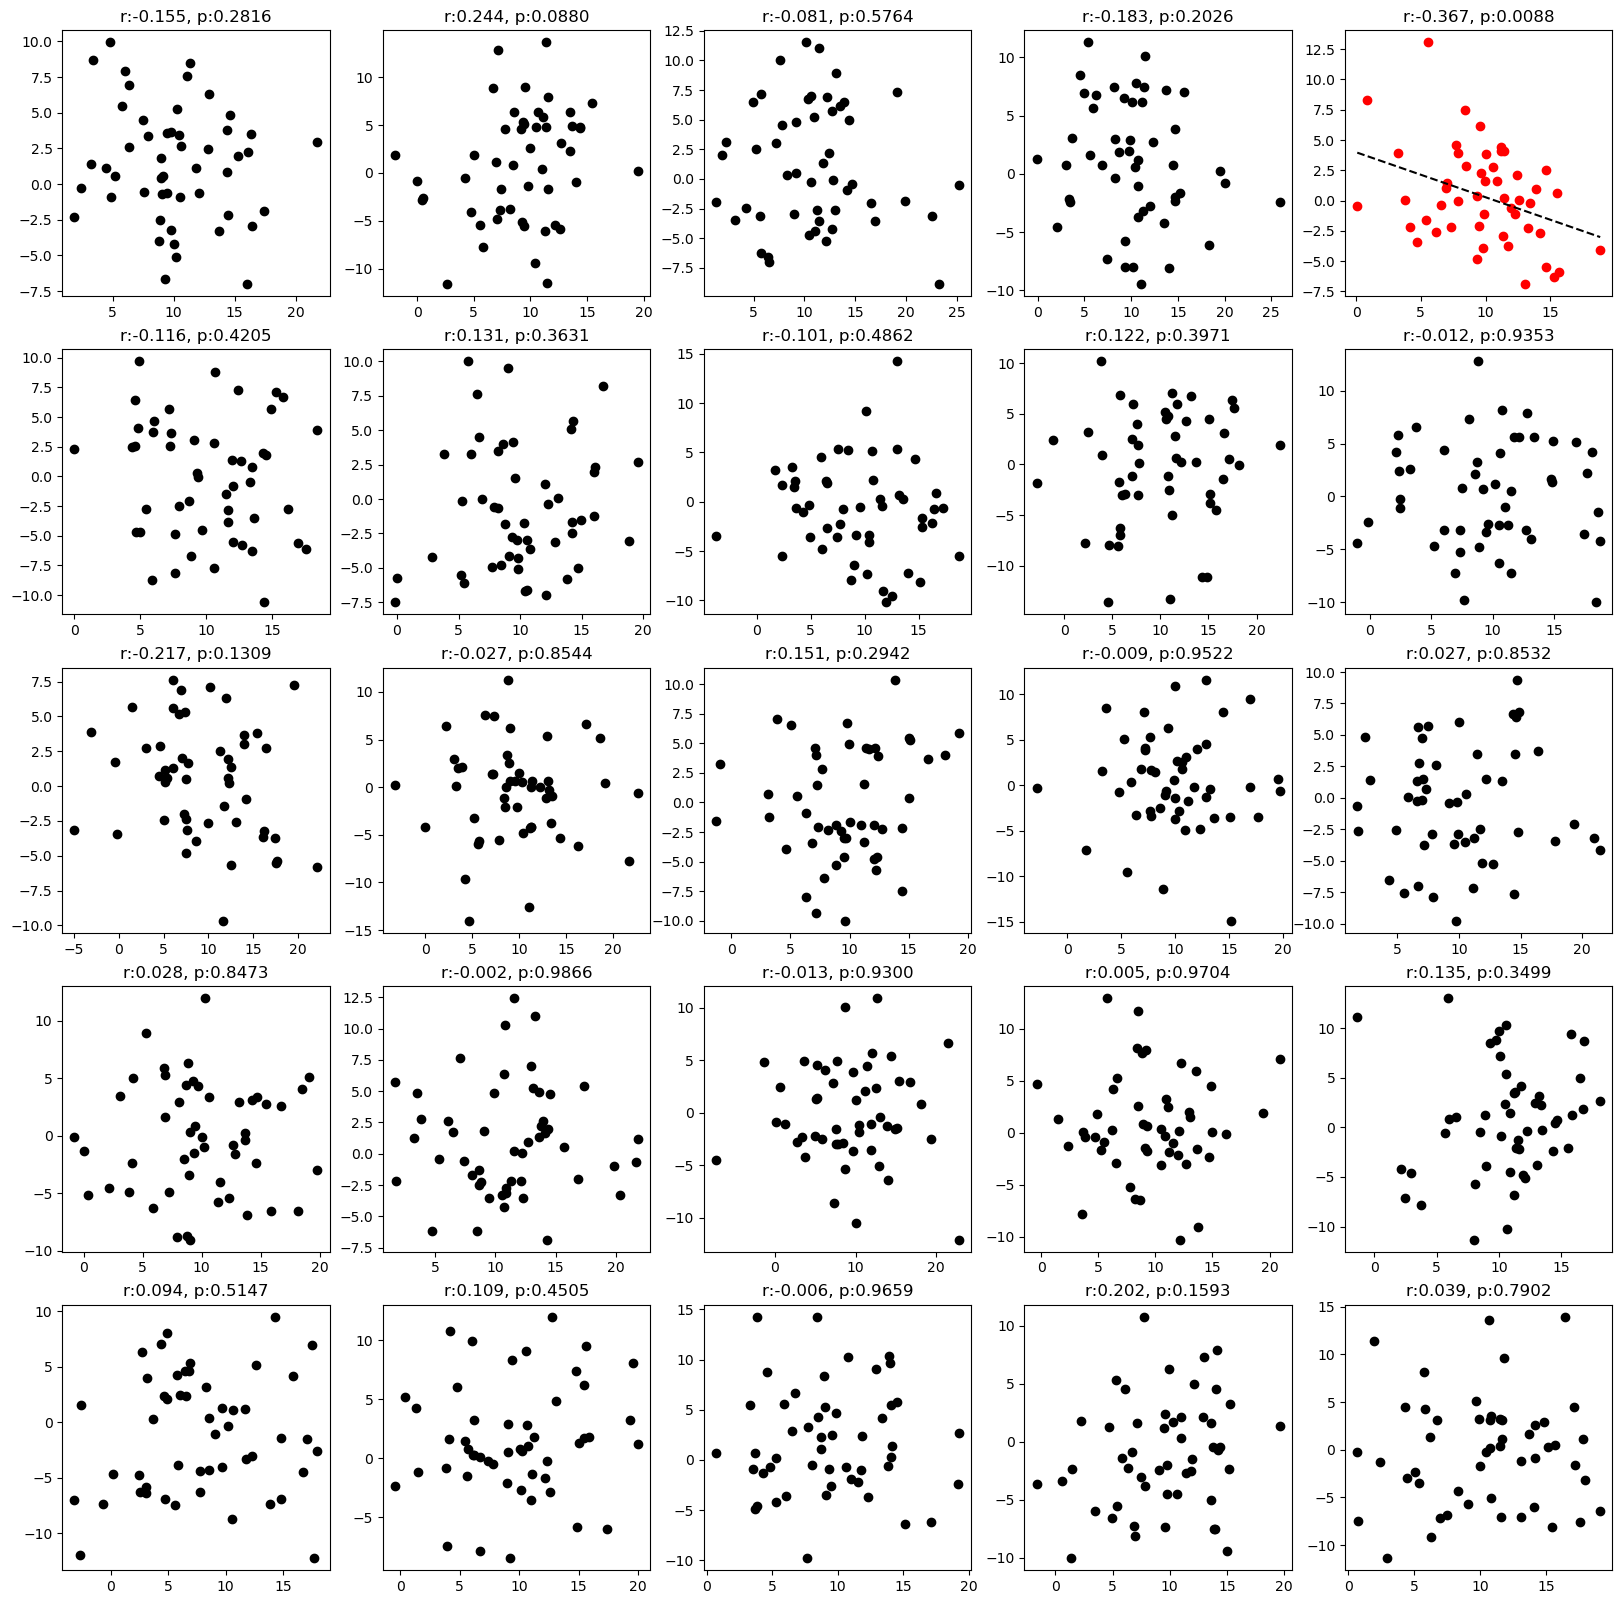

In [11]:
nrow=5
ncol=5
fig, ax = plt.subplots(nrow,ncol,figsize=(20,20))
nSize=50

for x in range(nrow):
    for y in range(ncol):
        a = np.random.normal(loc=10,scale=5,size=nSize)
        b = np.random.normal(loc=0,scale=5, size=nSize) # b does not depend on a, they are completely independent
        r,p = stats.pearsonr(a,b)
        xx = np.linspace(np.min(a),np.max(a),100)
        slope, intercept, r_value, p_value, std_err = stats.linregress(a,b)
        yy = xx*slope + intercept
        if p < 0.05:
            ax[x,y].plot(xx,yy, '--k')
            col="red"
        else:
            col="black"
        ax[x,y].scatter(a,b,c=col)
        ax[x,y].set_title("r:{:.3f}, p:{:.4f}".format(r,p))
        
        


In this case, we would need to apply a correction. For example a Bonferroni correction. The Bonferroni correction compensates for that increase by testing each individual hypothesis at a significance level of $\alpha/m$, where $\alpha$ is the desired overall alpha level and $m$ is the number of hypotheses.


[More on the multiple comparisons problem](https://en.wikipedia.org/wiki/Multiple_comparisons_problem)

#### False negatives

A non-significant p-value does not mean that you have shown that there is no relationship between the variables. There is always the possibility that there is a linear relationship that you have not been able to shown with enough certainty.


False negatives are a serious problem when you have small groups (low statistical power). In the code below, we perform Pearson correlation on data that are weakly correlated. Manipulate the sample size to see the effect on the number of false negative.


In [27]:
nSize=100 # sample size

for i in range(50):
    a = np.random.normal(loc=10,scale=5,size=nSize)
    b = a*1.5 + np.random.normal(loc=10,scale=30, size=nSize) # b depends on a, they are dependent but the effect is not strong
    r,p = stats.pearsonr(a,b)
    if(p<0.05):
        print("Correct detection of the linear relationship (true positive)")
    else:
        print("Failure to reject the null hypothesis (false negative)")

Failure to reject the null hypothesis (false negative)
Failure to reject the null hypothesis (false negative)
Failure to reject the null hypothesis (false negative)
Correct detection of the linear relationship (true positive)
Correct detection of the linear relationship (true positive)
Failure to reject the null hypothesis (false negative)
Correct detection of the linear relationship (true positive)
Correct detection of the linear relationship (true positive)
Failure to reject the null hypothesis (false negative)
Correct detection of the linear relationship (true positive)
Correct detection of the linear relationship (true positive)
Failure to reject the null hypothesis (false negative)
Correct detection of the linear relationship (true positive)
Correct detection of the linear relationship (true positive)
Correct detection of the linear relationship (true positive)
Correct detection of the linear relationship (true positive)
Failure to reject the null hypothesis (false negative)
Corre

#### Outliers and Pearson correlations

Pearson correlation are very sensitive to outliers in your data. Outliers in correlations is a very common problem.

Let's see how an outlier can affect our conclusion.

In [12]:
def corPlot(a,b):
    r,p = stats.pearsonr(a,b)
    msg = "r: {:.3f}, p : {:.4}".format(r,p)
    slope, intercept, r_value, p_value, std_err = stats.linregress(a,b)
    x = np.linspace(np.min(a),np.max(a),100)
    y = x*slope + intercept
    plt.scatter(a,b)
    plt.plot(x,y, '--k')
    plt.title(msg)
    plt.show()

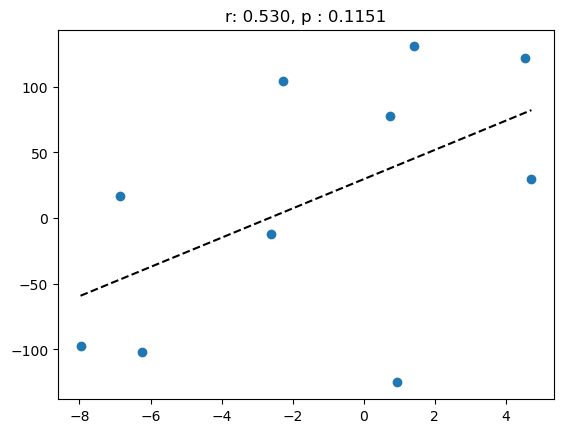

In [13]:
a = np.array([-6.24, -6.86,  0.74,  1.42, -7.97,   0.95,  4.55, -2.27,  -2.61,  4.72])
b = np.array([-101.57,   16.78,   78.10,  130.66,  -97.48, -125.12,  122.12,  104.31,  -12.41,   30.05])
corPlot(a,b)

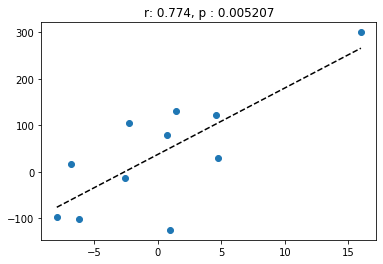

In [29]:
a = np.append(a,16)
b = np.append(b,300)
corPlot(a,b)

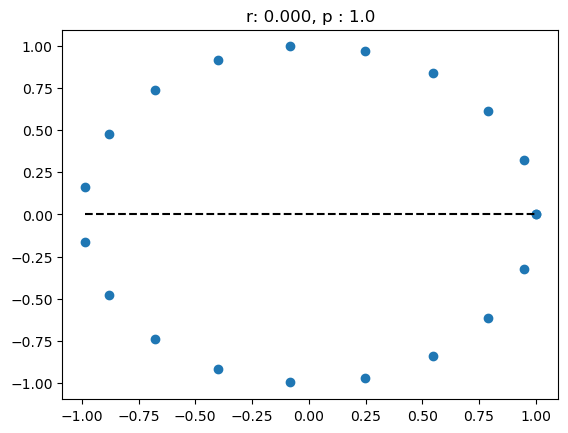

In [14]:
x = np.linspace(0,2*np.pi,20)
a = np.cos(x)
b = np.sin(x)
corPlot(a,b)

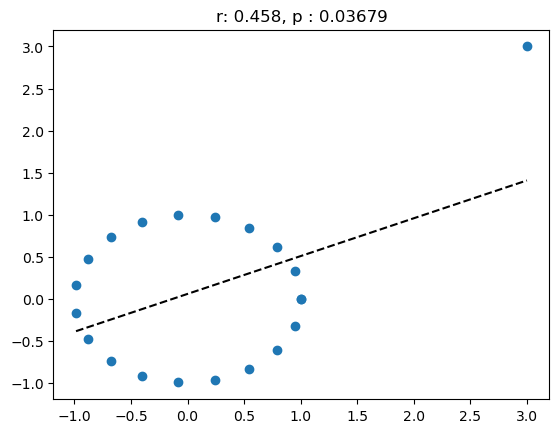

In [15]:
a = np.append(a,3)
b = np.append(b,3)
corPlot(a,b)

We went from a r-value of 0.000 to 0.458 with a single outlier.

In summary:

* p-values are not valid when there are outliers.
* A significant correlation can be caused by a single outlier. 
* Remove clear outliers before performing a Pearson correlation.

## t-tests

We are interested in 

* testing whether the mean of one sample is different from a known value
* testing whether the means of two samples are different

There are many types of t-tests depending on whether you have 1 or 2 samples, and whether the 2 samples are from the same subjects.

t-test depends on the [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).



| Situation   |    t-test    | scipy function |  Alternative tests |
|----------|-------------|------|--------| 
| One sample |  one-sample t-test | [scipy.stats.ttest_1samp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)  | [Wilcoxon signed-rank test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) |
| Two independent samples | Independent two-sample t-test | [scipy.stats.ttest_ind()]((https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)) | [Mann–Whitney U test](scipy.stats.mannwhitneyu), [Kolmogorov–Smirnov test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) |
| Two dependent samples |  Dependent two-sample t-test | [scipy.stats.ttest_rel()]((https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)) |  [Wilcoxon signed-rank test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) |
     



### Independent samples: 
* We measure the IQ of students in psychology and in biology.

### Dependent samples
* We measure the reaction time of psychology students before and after a long exam.


Don't use a dependent test on independent data and vice versa.

### Assumptions

* The samples are normally distributed ().
* Homogeneity of Variances

### Example

We measure the mean firing rate of neurons before and after the application of a drug. The same neurons are measured twice.

We want to test whether the drug changed the mean firing rate of the neurons. 

Which test is the most appropriate one? 

In [16]:
nSize=30
rateBefore = np.random.normal(loc=30,scale=5,size=nSize)
rateAfter = rateBefore + 2 + np.random.normal(loc=0,scale=2,size=nSize) 

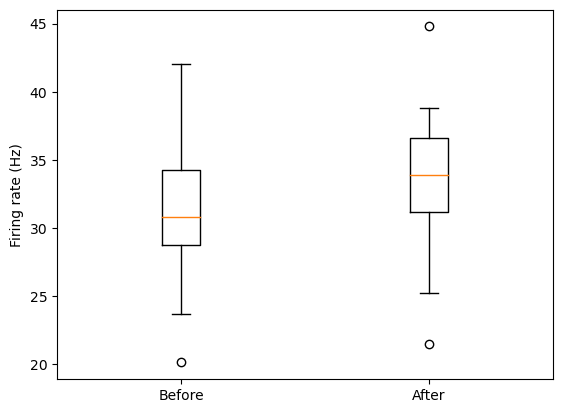

In [17]:
plt.boxplot([rateBefore,rateAfter],labels=["Before","After"])
plt.ylabel("Firing rate (Hz)")
plt.show()

$H_0$: The means of the two samples are equal.

$H_1$: The means of the two samples differ.


In [18]:
stats.ttest_rel(rateBefore,rateAfter)

Ttest_relResult(statistic=-7.658526896959079, pvalue=1.9151353933942294e-08)

The p-value is smaller than 0.05. We reject $H_0$ and conclude that the mean of the two samples differ. 

The firing rate was significantly higher after the application of our drug.


If the data were not nomrally distributed, we should use the Wilcoxon signed-rank test instead of a t-test.

In [19]:
stats.wilcoxon(rateBefore,rateAfter)

WilcoxonResult(statistic=2.0, pvalue=5.587935447692871e-09)

## Common mistakes when applying statistical tests

eLife recently published a very comprehensible overview of the most common mistakes seen in manuscript (and published papers).

[Ten common statistical mistakes to watch out for when writing or reviewing a manuscript](https://elifesciences.org/articles/48175)

You should read this article a few times until you assimilate the content.

<div>
<img src="../images/elife_ten_errors.png" width=800/>
</div>

# Course evaluation

Short survey to get some feedback from students: 
https://forms.gle/31dzQovQZv1aPVdC9